<a href="https://colab.research.google.com/github/LukmaanViscomi/AI-Deep-Learning/blob/main/Assignment_Draft_2d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### TASK A. CLASSIFICATION PROBLEM

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Task Requirments:

1. Load and preprocess the dataset for the classification problem (handle missing data, convert categorical features to numerical features).

2. Build a classifier for the classification problem using one of the specified models (logistic regression, decision trees, random forests, or artificial neural networks).

3. Fine-tune the selected model using appropriate techniques (eg, hyperparameter tuning, cross-validation, etc).

4. Visualise the dataset and / or the model's results, where applicable (eg, feature importance, confusion matrix, etc).

5. Report the final performance of the selected model using appropriate performance metrics (eg, accuracy, F1-score, etc).

###Response to Task Requirements 1 to 5

###Install Specific Scipy, Numpy, and Scikit-Plot Versions:

Description: This task installs a specific version of the scipy library (version 1.7.3), along with numpy (version 1.22.4) to ensure compatibility with older functions used in the project. The installation of scikit-plot is also included for plotting purposes in the evaluation stages. This ensures that all necessary packages are available and avoids potential compatibility issues during the analysis.

In [ ]:
!pip install scipy==1.7.3
!pip install numpy>=1.23.0
!pip install scikit-plot

###Import Libraries:

Description: This task imports the necessary Python libraries for data processing, machine learning, and visualization. Each library plays a critical role:

*   pandas and numpy for data handling.
*   sklearn for machine learning algorithms and metrics.
*   matplotlib and seaborn for visualizations.
*   SimpleImputer and LabelEncoder for handling missing data and categorical variables.

(The models were buid in Google Colab whick has an extensive pre-installed set of ML libraries. The import statement assume that the appropirate packages are installed)

*  Note: During the project for the purposes of colaboration and symetry in training environments, we build out a customised Anaconda Environment to mimic the google colab system state for development and training purposes (Due to resource constraints on Google Colab Cloud).

https://github.com/LukmaanViscomi/AI-Deep-Learning/blob/main/Build_Customised_Anaconda_Environment_For_Machine_Learning.ipynb





In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


###Load Dataset:
Description: This task loads the dataset into a pandas DataFrame from a CSV file. The dataset is the starting point for the entire machine learning pipeline, containing the features and target variable that will be used to train and test the model.

In [ ]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/classification_data.csv')


In [ ]:
# Display the first few rows of the dataset
data.head()


,target,var1,var2,var3,var4,var5,var6,var7
0,0,509.18,417.681,Micronesia,138.0,393.00,no,20/07/2019 13:21
1,0,446.06,666.182,Dominica,81.0,352.05,yes,04/04/2019 21:30
2,1,235.50,398.097,Isle of Man,90.0,339.00,no,03/03/2019 02:59
3,0,306.02,518.163,Turkmenistan,102.0,439.25,yes,19/03/2019 08:00
4,0,453.08,600.156,Cameroon,105.0,422.95,no,18/03/2019 13:22


###Separate Columns:

Description: This task identifies and separates the dataset's columns into numerical and categorical columns based on their data types. This is important because different types of data (numerical vs. categorical) require different preprocessing techniques before feeding into the model.



In [ ]:
# Separate numerical and categorical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns


###Impute Missing Numerical Data:
Description: This task handles missing values in the numerical columns by using the SimpleImputer to replace missing values with the mean of each column. Imputing missing data is essential to prevent issues in model training, as most machine learning algorithms cannot handle missing values.

In [ ]:
# Handle missing data for numerical columns
imputer_num = SimpleImputer(strategy='mean')
data[numerical_cols] = imputer_num.fit_transform(data[numerical_cols])


###Encode Categorical Data:
Description: This task encodes categorical variables into numerical values using LabelEncoder. Many machine learning algorithms cannot handle non-numeric data, so categorical data needs to be converted into a numeric format for the model to process it effectively.

In [ ]:
# Convert categorical features to numerical features
label_encoders = {}
for column in categorical_cols:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le



###Split Data:
Description: This task splits the DataFrame into features (X) and target (y). The features are the input data used to predict the target, which is the variable the model is attempting to classify or predict. This step prepares the data for the next stages in the machine learning pipeline.

In [ ]:
# Split the data into features and target
X = data.drop('target', axis=1)  # assuming 'target' is the column name for the target variable
y = data['target']


###Standardize Features:
Description: This task standardises the feature data using StandardScaler, ensuring that all features have a mean of 0 and a standard deviation of 1. This normalization process is crucial for algorithms like Random Forests to ensure that features are treated equally and not dominated by larger numerical values.

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


###Train-Test Split:
Description: This task splits the data into training and testing sets, with 80% of the data used for training and 20% reserved for testing. The training set is used to fit the model, while the testing set evaluates the model's performance on unseen data. The random_state=42 ensures reproducibility of the split.

In [ ]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


###Initialize Classifier:
Description: This task initializes a RandomForestClassifier, a robust and widely used ensemble learning method. By setting a fixed random seed, we ensure reproducibility in the training process. This classifier will be tuned and trained in subsequent steps.

In [ ]:
# Initialize the classifier
rf_classifier = RandomForestClassifier(random_state=42)


###Parameter Grid:
Description: This task defines a parameter grid for GridSearchCV, specifying values for key hyperparameters such as n_estimators, max_depth, min_samples_split, and criterion. The criterion parameter allows the model to evaluate both Gini impurity and Entropy for measuring the quality of a split. The grid search will test different combinations of these hyperparameters to determine the best-performing model configuration.

In [ ]:
# Define the parameter grid for GridSearchCV with criterion
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']  # Add this to try both Gini impurity and Entropy
}


###GridSearchCV:
Description: This task initializes the GridSearchCV, which automates the process of hyperparameter tuning. It performs 5-fold cross-validation over the defined parameter grid, scoring the models using accuracy. This method allows the model to generalize better by testing different parameter combinations.

In [ ]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)


###Fit The Model:
Description: This task fits the GridSearchCV on the training data, performing the cross-validation and hyperparameter search. The goal is to find the best combination of hyperparameters to optimize the model's accuracy.

In [ ]:
# Fit the model
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

###Best Parameters:
Description: This task extracts the best parameters found by GridSearchCV and initializes the best-performing model. These parameters will be used to train the final model, which should yield the best results based on the search criteria.

In [ ]:
# Best parameters
best_params = grid_search.best_params_
best_rf_classifier = grid_search.best_estimator_


### Summarize Hyperparameter Tuning Results
Description: This task involves extracting and summarizing the best hyperparameters and performance metrics from the grid search or random search tuning process. The best combination of hyperparameters is identified based on cross-validation, providing insights into how the model was optimized for performance.


In [ ]:
# Extract the best parameters and summarize
def hyperparameter_tuning_summary(grid_search):
    print("### Hyperparameter Tuning Summary ###")
    print(f"Best Number of Estimators: {grid_search.best_params_['n_estimators']}")
    print(f"Best Maximum Depth: {grid_search.best_params_['max_depth']}")
    print(f"Best Minimum Samples Split: {grid_search.best_params_['min_samples_split']}")
    print(f"Best Criterion: {grid_search.best_params_['criterion']}")
    print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

# Generate summary
hyperparameter_tuning_summary(grid_search)


### Hyperparameter Tuning Summary ###
Best Number of Estimators: 100
Best Maximum Depth: None
Best Minimum Samples Split: 5
Best Criterion: gini
Best Cross-Validation Accuracy: 0.9622


### Evaluate Model Performance Across Training, Test, and Cross-Validation Sets
Description: This task evaluates the RandomForestClassifier on three distinct sets: the training set, test set, and cross-validation set. By assessing performance on these sets, we can determine how well the model fits the training data, generalizes to unseen test data, and performs under cross-validation to ensure robust results. The metrics used include accuracy for each of these sets.


In [ ]:
# Evaluate the model's accuracy on the test set
test_accuracy = best_rf_classifier.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Display the best cross-validation accuracy from the GridSearchCV
print("Best cross-validation accuracy: {:.2f}%".format(grid_search.best_score_ * 100))

# Evaluate the model's accuracy on the training set
training_accuracy = best_rf_classifier.score(X_train, y_train)
print(f"Training Accuracy: {training_accuracy * 100:.2f}%")


Test Accuracy: 95.68%
Best cross-validation accuracy: 96.22%
Training Accuracy: 99.46%


###Feature Importance:
Description: This task retrieves and visualizes the feature importances of the RandomForestClassifier. It ranks features based on their contribution to the model's predictive power, helping to identify which features are most influential in the model’s decisions.

In [ ]:
# Feature importance
importances = best_rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]


###Plot Feature Importances:
Description: This task generates a bar plot of the feature importances, helping to visualize the significance of each feature. It helps in understanding which features have the most impact on the predictions, allowing for potential feature selection or further analysis.

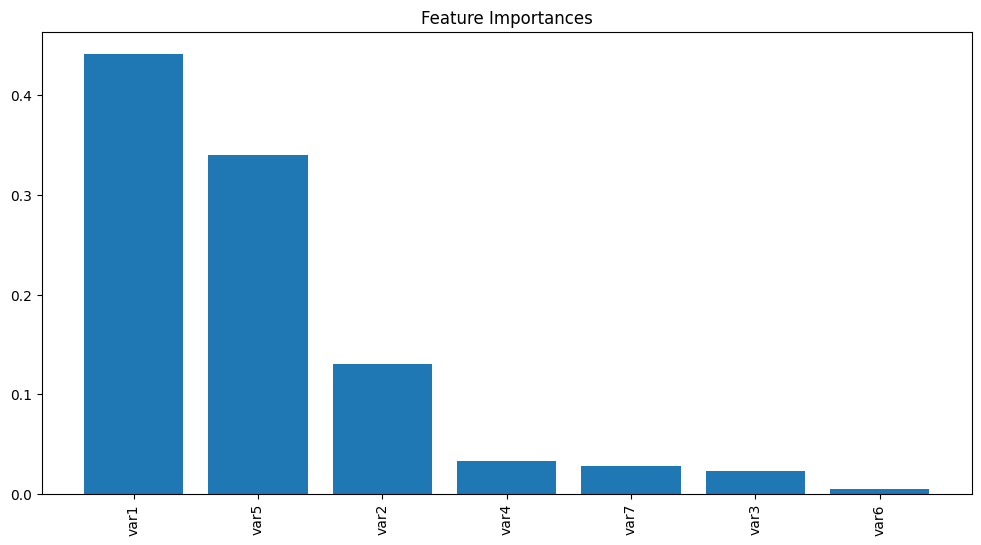

In [ ]:
# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.show()


###Predictions and Confusion Matrix:
Description: This task makes predictions on the test set using the best-performing model from the GridSearchCV, then computes the confusion matrix to evaluate the model’s performance. The confusion matrix shows the number of true positives, true negatives, false positives, and false negatives, providing a comprehensive view of classification accuracy.

In [ ]:
# Predictions and confusion matrix
y_pred = best_rf_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)


###Plot Confusion Matrix:

Description: This task visualizes the confusion matrix as a heatmap. The confusion matrix shows the number of correct and incorrect predictions made by the classifier for each class. This helps in understanding the classification performance by providing insights into the number of true positives, true negatives, false positives, and false negatives.

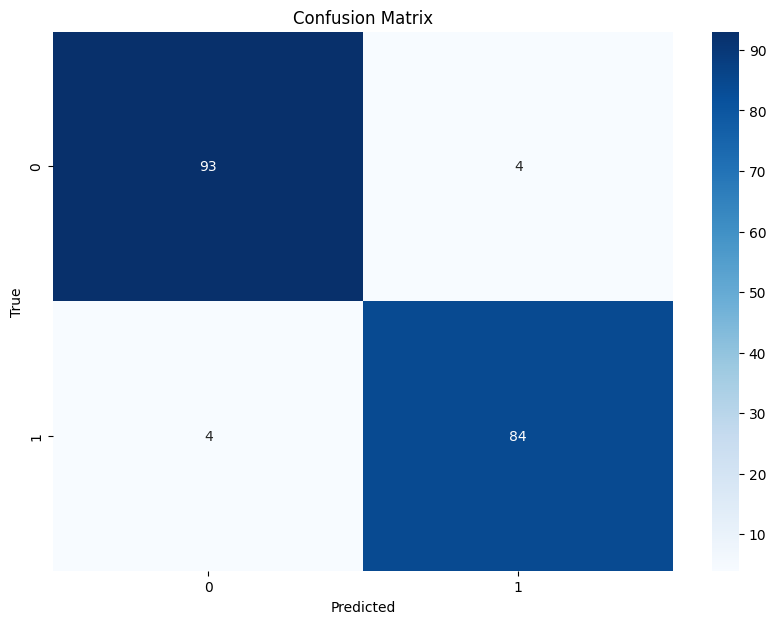

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


### Normalized Confusion Matrix:

Description: This task generates a normalized confusion matrix to evaluate the performance of the classifier. The confusion matrix shows the percentage of correctly and incorrectly classified instances, normalized by the total number of instances in each class. This helps visualize the classification accuracy for each class.

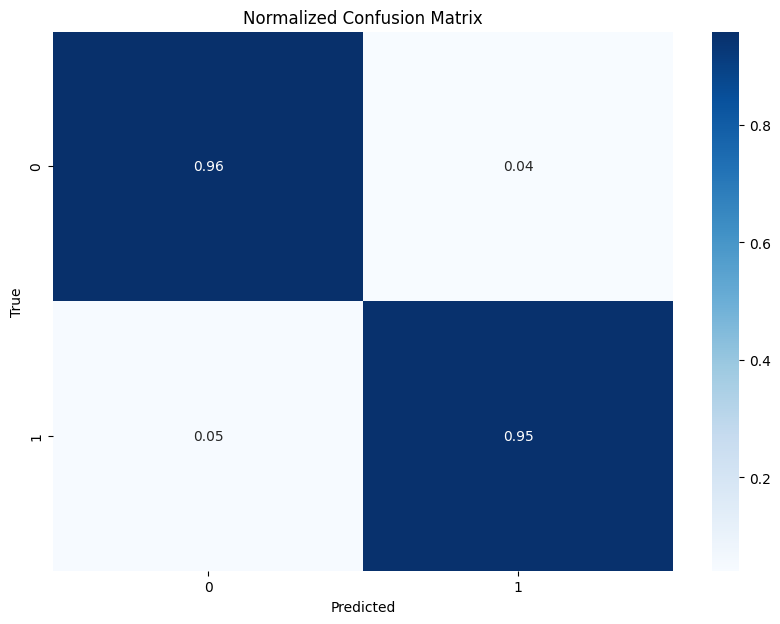

In [ ]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Normalized Confusion Matrix")
plt.show()


###Classification Report: (Table)
Description: This task generates and prints a detailed classification report that includes precision, recall, F1-score, and support for each class. The report provides a summary of the classifier's performance across multiple metrics, helping to evaluate the overall effectiveness of the model.

In [ ]:
# Classification report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96        97
         1.0       0.95      0.95      0.95        88

    accuracy                           0.96       185
   macro avg       0.96      0.96      0.96       185
weighted avg       0.96      0.96      0.96       185



###Classification Report:(Graph)

Description: This task creates a classification report that includes precision, recall, F1-score, and support for each class. The results are visualized as a heatmap for easier interpretation of the model’s classification performance across different metrics.

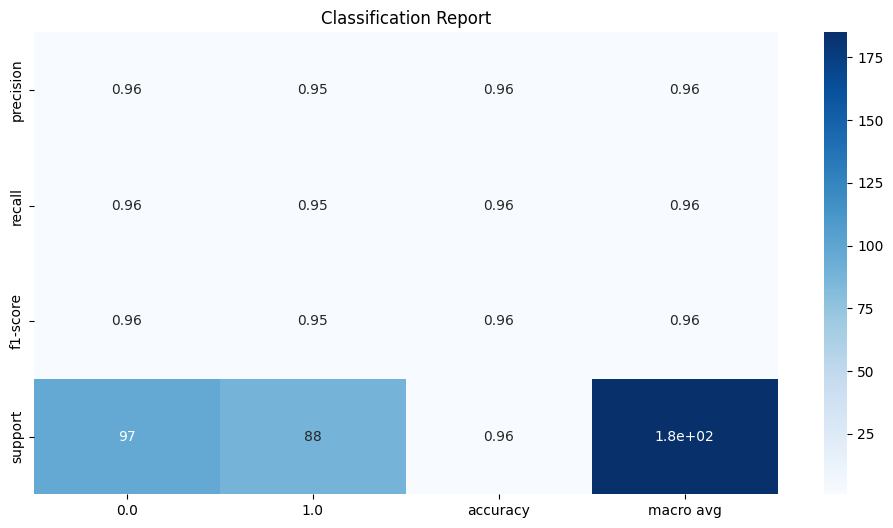

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(12, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap="Blues")
plt.title("Classification Report")
plt.show()


###Cumulative Gains Chart

Description: This task generates a cumulative gains chart to evaluate the performance of the classifier. It shows how well the model distinguishes between the two classes (0 and 1) by plotting the cumulative gains as a function of the percentage of the sample. The closer the curve is to the top-left corner, the better the classifier's performance.

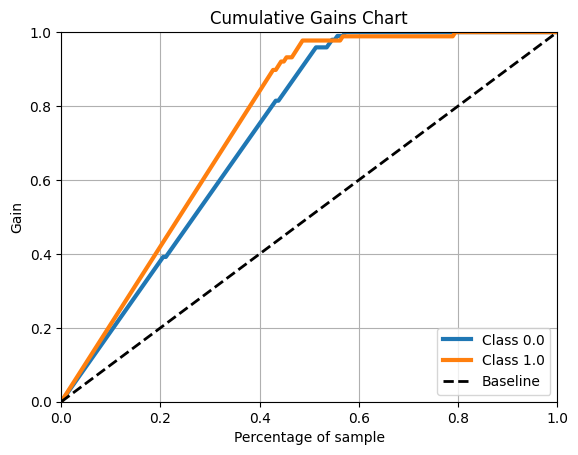

In [ ]:
import scikitplot as skplt
# Plot the cumulative gains chart
skplt.metrics.plot_cumulative_gain(y_test, best_rf_classifier.predict_proba(X_test))
plt.title('Cumulative Gains Chart')
plt.show()


###Receiver Operating Characteristic (ROC) Curve:

Description: This task plots the ROC curve and calculates the AUC (Area Under the Curve) score. The ROC curve visualizes the trade-off between the true positive rate (sensitivity) and false positive rate for different threshold values. The AUC score quantifies the model's overall ability to discriminate between classes, with a value closer to 1 indicating better performance.

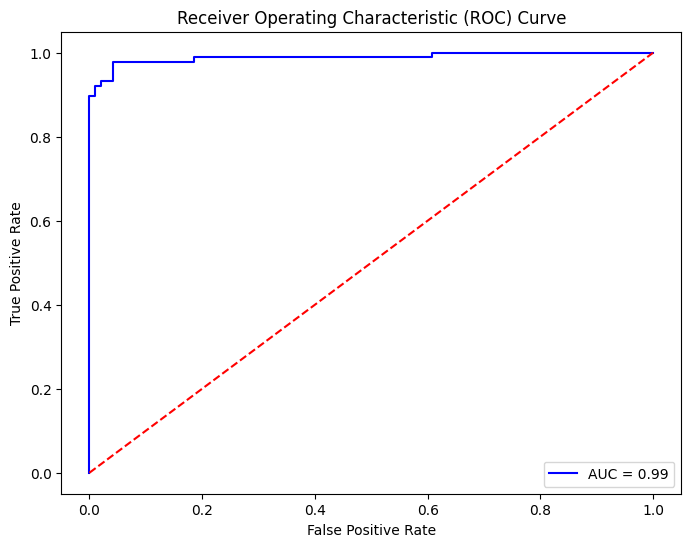

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute the ROC curve and AUC score
y_prob = best_rf_classifier.predict_proba(X_test)[:, 1]  # Assuming binary classification
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


###Precision-Recall Curve:

Description: This task generates the precision-recall curve to evaluate the model's performance, especially for imbalanced datasets. The curve plots precision versus recall for different threshold values, with higher values indicating better performance. The average precision score is also calculated.

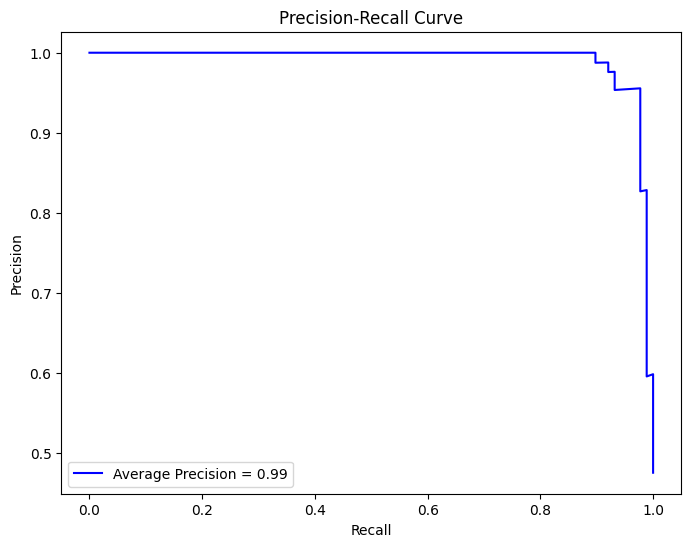

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute the Precision-Recall curve and average precision score
precision, recall, _ = precision_recall_curve(y_test, y_prob)
avg_precision = average_precision_score(y_test, y_prob)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label=f'Average Precision = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


###Learning Curves:

Description: This task computes and plots the learning curves to analyze the model’s performance with respect to the size of the training dataset. The plot shows the training and validation accuracy as a function of the training set size, helping to identify whether the model suffers from high bias or high variance.



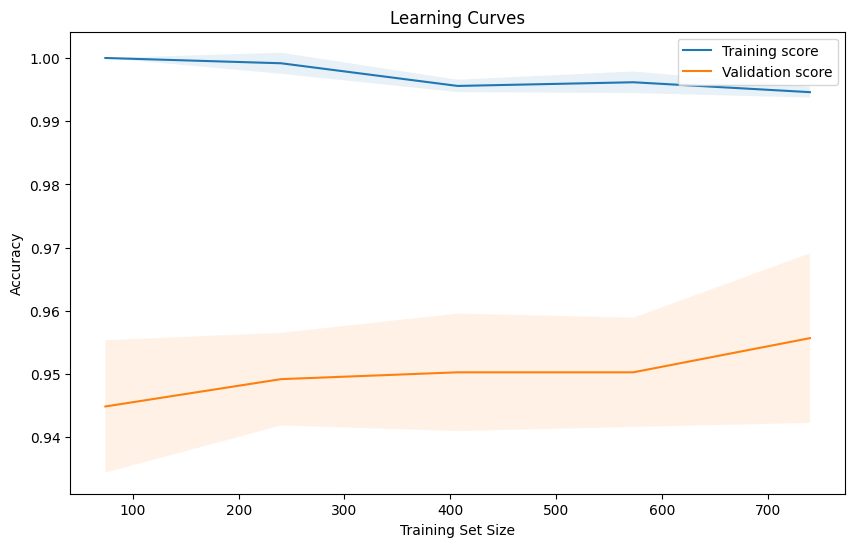

In [ ]:
from sklearn.model_selection import learning_curve

# Compute learning curves
train_sizes, train_scores, val_scores = learning_curve(best_rf_classifier, X_scaled, y, cv=5, scoring='accuracy', n_jobs=-1)

# Calculate mean and standard deviation for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, val_mean, label='Validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.show()


### Feature Importances:

Description: This task visualizes the importance of each feature used in the model. By plotting the relative importance of each feature, the task helps identify which features contribute the most to the model's predictive power.

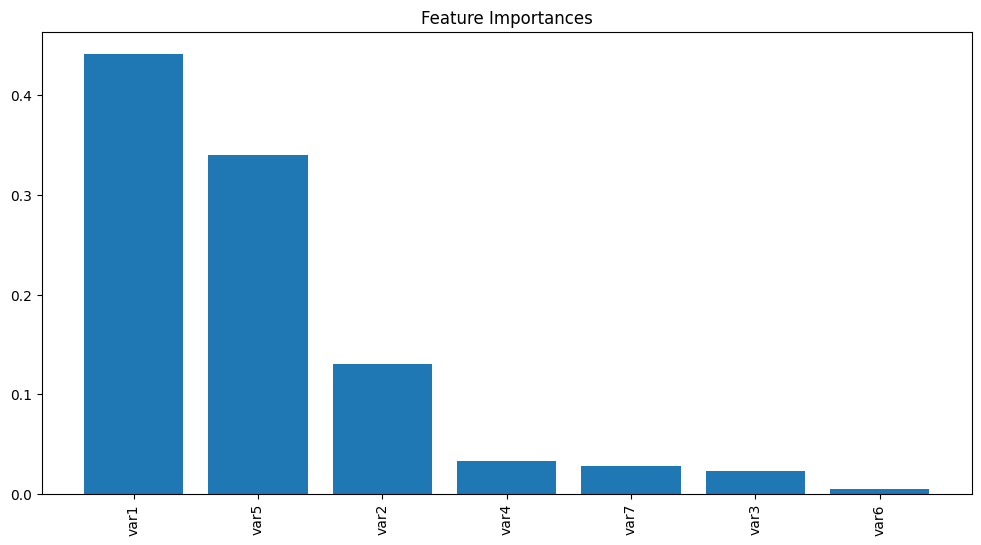

In [ ]:
importances = best_rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.show()


###Partial Dependence Plot:

Description: This task generates partial dependence plots (PDP) to visualize the relationship between selected features and the target variable, holding other features constant. PDPs help interpret how the model's predictions change with varying values of specific features, providing insights into feature importance.

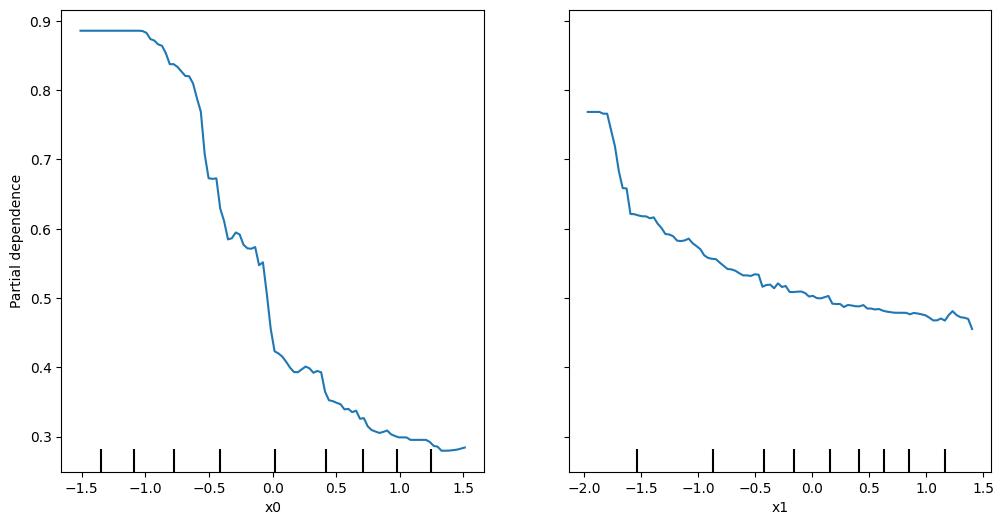

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Example: first two features
features = [0, 1]

# Create subplots for partial dependence
fig, ax = plt.subplots(figsize=(12, 6))

# Use PartialDependenceDisplay instead of plot_partial_dependence
PartialDependenceDisplay.from_estimator(best_rf_classifier, X_train, features, ax=ax)

# Show the plot
plt.show()


### ===================  TASK A -  COMPLETED  =============================

### TASK B. Multi-label image-based digit classification problem

###Task Requirments:

6. Load and preprocess the dataset for the multi-label image-based digit classification problem (normalise pixel values, resize images if necessary, etc).

7. Build a convolutional neural network (CNN) model for the multi-label image-based digit classification task.

8. Fine-tune the CNN model using appropriate techniques (eg, hyperparameter tuning, cross-validation, etc).

9. Visualise the dataset and / or the CNN model's results, where applicable (eg, feature maps, learning curves, etc).

10. Report the final performance of the CNN model using appropriate performance metrics (eg, accuracy, F1-score, etc).

11. Collaborate within the team and decide on the best model (for classification) and CNN architecture (for digit recognition).


###Response to Task Requirements 6 to 11

### Setup and Dependencies
Description: This section installs the required software and libraries for extracting files and setting up the working environment.

In [4]:
### Section 1: Setup and Dependencies
!apt-get install p7zip-full # Install 7-Zip
!pip install patool # Install the patool library which provides the patoolib module
import zipfile
import os
import patoolib # Now you can import patoolib

# Path to the uploaded zip file
zip_file_path = '/content/drive/MyDrive/dataset2.zip'
extracted_folder_path = './dataset2'  # Use a relative path for the extraction directory

# Extract the zip file using patool
patoolib.extract_archive(zip_file_path, outdir=extracted_folder_path)

# List the contents of the extracted folder
extracted_files = os.listdir(extracted_folder_path)
print(extracted_files)



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-8).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.9/96.9 kB 1.8 MB/s eta 0:00:00


INFO patool: Extracting /content/drive/MyDrive/dataset2.zip ...
INFO:patool:Extracting /content/drive/MyDrive/dataset2.zip ...
INFO patool: ... creating output directory `./dataset2'.
INFO:patool:... creating output directory `./dataset2'.
INFO patool: running /usr/bin/7z x -o./dataset2 -- /content/drive/MyDrive/dataset2.zip
INFO:patool:running /usr/bin/7z x -o./dataset2 -- /content/drive/MyDrive/dataset2.zip
INFO patool:     with input=''
INFO:patool:    with input=''
INFO patool: ... /content/drive/MyDrive/dataset2.zip extracted to `./dataset2'.
INFO:patool:... /content/drive/MyDrive/dataset2.zip extracted to `./dataset2'.


['triple_mnist']


 ### Dataset Directory Setup and File Splitting:

 In this section, you are reorganising the dataset by splitting the images into training, validation, and test sets based on predefined ratios (60% train, 20% validation, 20% test). The files are copied into new directories structured in a way that can be easily fed into machine learning models for training and evaluation.

In [5]:
# Import Libraries
import os
import shutil
from pathlib import Path
import random

# Paths to original directories
original_base_dir = Path('dataset2/triple_mnist')
original_train_dir = original_base_dir / 'train'
original_val_dir = original_base_dir / 'val'
original_test_dir = original_base_dir / 'test'

# Path to the new dataset directory
new_base_dir = Path('dataset-c/triple_mnist')
new_train_dir = new_base_dir / 'train'
new_val_dir = new_base_dir / 'val'
new_test_dir = new_base_dir / 'test'

# Ensure the new directories exist
new_train_dir.mkdir(parents=True, exist_ok=True)
new_val_dir.mkdir(parents=True, exist_ok=True)
new_test_dir.mkdir(parents=True, exist_ok=True)

# Function to split and copy files
def split_and_copy_files(src_dir, new_train_dir, new_val_dir, new_test_dir, train_ratio=0.6, val_ratio=0.2, test_ratio=0.2):
    if not src_dir.exists():
        return

    classes = sorted(os.listdir(src_dir))

    for cls in classes:
        cls_path = src_dir / cls
        if cls_path.is_dir():
            images = list(cls_path.glob('*'))
            random.shuffle(images)

            num_train = int(len(images) * train_ratio)
            num_val = int(len(images) * val_ratio)

            train_images = images[:num_train]
            val_images = images[num_train:num_train+num_val]
            test_images = images[num_train+num_val:]

            cls_train_dir = new_train_dir / cls
            cls_val_dir = new_val_dir / cls
            cls_test_dir = new_test_dir / cls

            cls_train_dir.mkdir(parents=True, exist_ok=True)
            cls_val_dir.mkdir(parents=True, exist_ok=True)
            cls_test_dir.mkdir(parents=True, exist_ok=True)

            for img in train_images:
                shutil.copy(str(img), str(cls_train_dir / img.name))
            for img in val_images:
                shutil.copy(str(img), str(cls_val_dir / img.name))
            for img in test_images:
                shutil.copy(str(img), str(cls_test_dir / img.name))

# Split and copy files from original train, val, and test directories
split_and_copy_files(original_train_dir, new_train_dir, new_val_dir, new_test_dir)
split_and_copy_files(original_val_dir, new_train_dir, new_val_dir, new_test_dir)
split_and_copy_files(original_test_dir, new_train_dir, new_val_dir, new_test_dir)

print("Files split and copied successfully!")

Files split and copied successfully!


### Importing Essential Libraries

Description: This section imports the key libraries and modules required for handling data, building and training a CNN model, and visualizing results. These include tools for image processing, deep learning model construction, and utilities for handling class imbalances.It includes the Keras Tuner library for hyperparameter tuning, as well as key Keras components like Conv2D, Dense, Adam, and callback methods such as EarlyStopping and ReduceLROnPlateau.

In [2]:
#  import keras_tuner as kt
!pip install keras-tuner -q

import os
import numpy as np
import tensorflow as tf
import keras_tuner as kt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.4 MB/s eta 0:00:00


### Dataset Preparation and Image Loading
Description: In this section, directories for training, validation, and testing datasets are defined. It also specifies image size, batch size, and creates ImageDataGenerator instances to rescale pixel values and load the images in grayscale mode. These generators are then used to load images into the model for training, validation, and testing, ensuring data is ready for further processing.

In [6]:
# Define directories for training, validation, and testing datasets
train_dir = os.path.join('/content/dataset-c/triple_mnist/train')
val_dir = os.path.join('/content/dataset-c/triple_mnist/val')
test_dir = os.path.join('/content/dataset-c/triple_mnist/test')

# Image size and batch size
image_size = (42, 42)
batch_size = 32

# Create ImageDataGenerator with color_mode set to 'grayscale'
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
val_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load images with 'grayscale' mode
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale',  # Convert images to grayscale
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale',  # Convert images to grayscale
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale',  # Convert images to grayscale
    shuffle=False
)

Found 60000 images belonging to 1000 classes.
Found 20000 images belonging to 1000 classes.
Found 20000 images belonging to 1000 classes.


###Building the Model - Hyperparameter Tuning with Keras Tuner

Description: This section sets up the Keras Tuner to optimize the hyperparameters of the CNN model, including the number of filters, dense units, dropout rate, learning rate, L2 regularization, batch size, and activation function. It uses the Hyperband search algorithm and evaluates the model based on validation accuracy.

In [7]:
from tensorflow.keras.layers import Input

# Function to build the model with hyperparameters
def build_model(hp):
    model = Sequential()

    # Define the input layer explicitly to avoid warnings
    model.add(Input(shape=(42, 42, 1)))

    # Hyperparameters to tune
    hp_filters_1 = hp.Int('filters_1', min_value=32, max_value=128, step=32)
    hp_filters_2 = hp.Int('filters_2', min_value=64, max_value=256, step=64)
    hp_dense_units = hp.Int('dense_units', min_value=64, max_value=256, step=64)
    hp_dropout_rate = hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)
    hp_learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
    hp_l2_reg = hp.Float('l2_regularization', min_value=1e-5, max_value=1e-2, sampling='log')
    hp_batch_size = hp.Choice('batch_size', values=[16, 32, 64])
    hp_activation = hp.Choice('activation', values=['relu', 'leaky_relu', 'sigmoid', 'tanh'])

    # First convolutional layer
    model.add(Conv2D(hp_filters_1, (3, 3), kernel_regularizer=l2(hp_l2_reg)))
    if hp_activation == 'leaky_relu':
        model.add(tf.keras.layers.LeakyReLU(alpha=0.01))
    else:
        model.add(tf.keras.layers.Activation(hp_activation))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    # Second convolutional layer
    model.add(Conv2D(hp_filters_2, (3, 3), kernel_regularizer=l2(hp_l2_reg)))
    if hp_activation == 'leaky_relu':
        model.add(tf.keras.layers.LeakyReLU(alpha=0.01))
    else:
        model.add(tf.keras.layers.Activation(hp_activation))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    # Fully connected layer
    model.add(Flatten())
    model.add(Dense(hp_dense_units, kernel_regularizer=l2(hp_l2_reg)))
    if hp_activation == 'leaky_relu':
        model.add(tf.keras.layers.LeakyReLU(alpha=0.01))
    else:
        model.add(tf.keras.layers.Activation(hp_activation))
    model.add(BatchNormalization())
    model.add(Dropout(hp_dropout_rate))

    # Output layer
    model.add(Dense(train_generator.num_classes, activation='softmax'))

    # Compile model
    model.compile(optimizer=Adam(learning_rate=hp_learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model



###Hyperparameter Tuning with Keras Tune
Description:
This section sets up the Keras Tuner using the Hyperband search algorithm. It defines the objective (val_accuracy) to optimize and sets a maximum of 20 epochs. The results will be saved in the specified directory.

In [10]:
# Instantiate the Keras Tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=20,
    factor=3,
    directory='/content/drive/MyDrive/my_dir',
    project_name='cnn_tuning'
)


Reloading Tuner from /content/drive/MyDrive/my_dir/cnn_tuning/tuner0.json


###Callbacks and Running the Hyperparameter Search
Description:
This section defines two callbacks: EarlyStopping to halt training when the validation loss stops improving, and ReduceLROnPlateau to reduce the learning rate when the validation loss plateaus. Then, it runs the hyperparameter tuning using the tuner.search function on the training and validation datasets.

In [13]:
# Set up callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-5)

# Run the hyperparameter search
tuner.search(train_generator,
             epochs=20,
             validation_data=val_generator,
             callbacks=[early_stopping, reduce_lr])


###Retrieve Best Hyperparameters and Model
Description:
Once the search is complete, this section retrieves the best set of hyperparameters and the model associated with those parameters. It then prints out the optimal values for each hyperparameter.

In [14]:
# Get the best hyperparameters and model
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.get_best_models(num_models=1)[0]

# Print the best hyperparameters found
print("Best Hyperparameters:")
print(f"Filters for 1st Conv Layer: {best_hp.get('filters_1')}")
print(f"Filters for 2nd Conv Layer: {best_hp.get('filters_2')}")
print(f"Dense Units: {best_hp.get('dense_units')}")
print(f"Dropout Rate: {best_hp.get('dropout_rate')}")
print(f"Learning Rate: {best_hp.get('learning_rate')}")
print(f"L2 Regularization: {best_hp.get('l2_regularization')}")
print(f"Batch Size: {best_hp.get('batch_size')}")
print(f"Activation Function: {best_hp.get('activation')}")


Best Hyperparameters:
Filters for 1st Conv Layer: 96
Filters for 2nd Conv Layer: 64
Dense Units: 128
Dropout Rate: 0.4
Learning Rate: 0.00025071332274895686
L2 Regularization: 0.002369069534544757
Batch Size: 16
Activation Function: leaky_relu


###Section 6: Model Summary and Final Training
Description:
This section prints the architecture of the best model found by the tuner. It then trains the model using the optimal hyperparameters on the full dataset for 20 epochs with the defined callbacks.

In [16]:
# Print the model architecture
print("\nWinning Model Architecture:")
best_model.summary()

# Train the model with the best hyperparameters on the full dataset
history = best_model.fit(train_generator,
                         epochs=20,
                         validation_data=val_generator,
                         callbacks=[early_stopping, reduce_lr])



Winning Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 40, 40, 96)          │             960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 40, 40, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 40, 40, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 20, 20, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 18, 18, 64)          │          55,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 18, 18, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 18, 18, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 9, 9, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5184)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         663,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1000)                │         129,000 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,549,306 (9.72 MB)

 Trainable params: 849,576 (3.24 MB)

 Non-trainable params: 576 (2.25 KB)

 Optimizer params: 1,699,154 (6.48 MB)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 535s 285ms/step - accuracy: 0.9333 - loss: 0.4114 - val_accuracy: 0.9598 - val_loss: 0.3527 - learning_rate: 2.5071e-04
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 564s 287ms/step - accuracy: 0.9460 - loss: 0.4010 - val_accuracy: 0.9516 - val_loss: 0.4054 - learning_rate: 2.5071e-04
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 550s 280ms/step - accuracy: 0.9510 - loss: 0.3968 - val_accuracy: 0.9471 - val_loss: 0.4171 - learning_rate: 2.5071e-04
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 519s 277ms/step - accuracy: 0.9508 - loss: 0.4001 - val_accuracy: 0.9445 - val_loss: 0.4331 - learning_rate: 2.5071e-04
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 521s 278ms/step - accuracy: 0.9663 - loss: 0.3591 - val_accuracy: 0.9670 - val_loss: 0.3300 - learning_rate: 5.0143e-05
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 521s 277ms/step - accuracy: 0.9828 - loss: 0.2813 - val_accuracy: 0.9679 - val_loss: 0.3010 - learning_rate: 5.0143e-05
Epoch 7/20
1875/1875 ━━━━━━━

###Plot Learning Curves
Description:
This section visualizes the training and validation accuracy and loss over time by plotting the learning curves. It uses matplotlib to display two subplots: one for accuracy and one for loss.

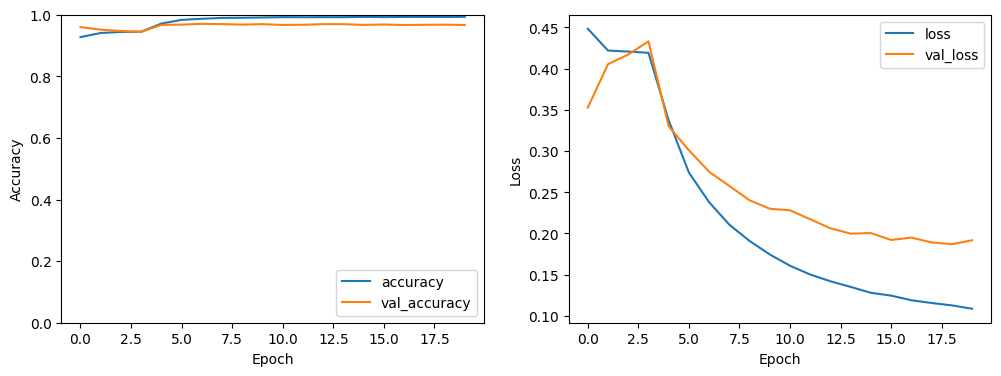

In [17]:
# Plot learning curves
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()


###Evaluate the Model on Test Data
Description:
The final section evaluates the best model on the test dataset and prints the resulting accuracy. This provides a measure of how well the model generalizes to unseen data.

In [18]:
# Evaluate the model on the test data
test_loss, test_accuracy = best_model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy:.4f}')


625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 70ms/step - accuracy: 0.9726 - loss: 0.1680
Test accuracy: 0.9683


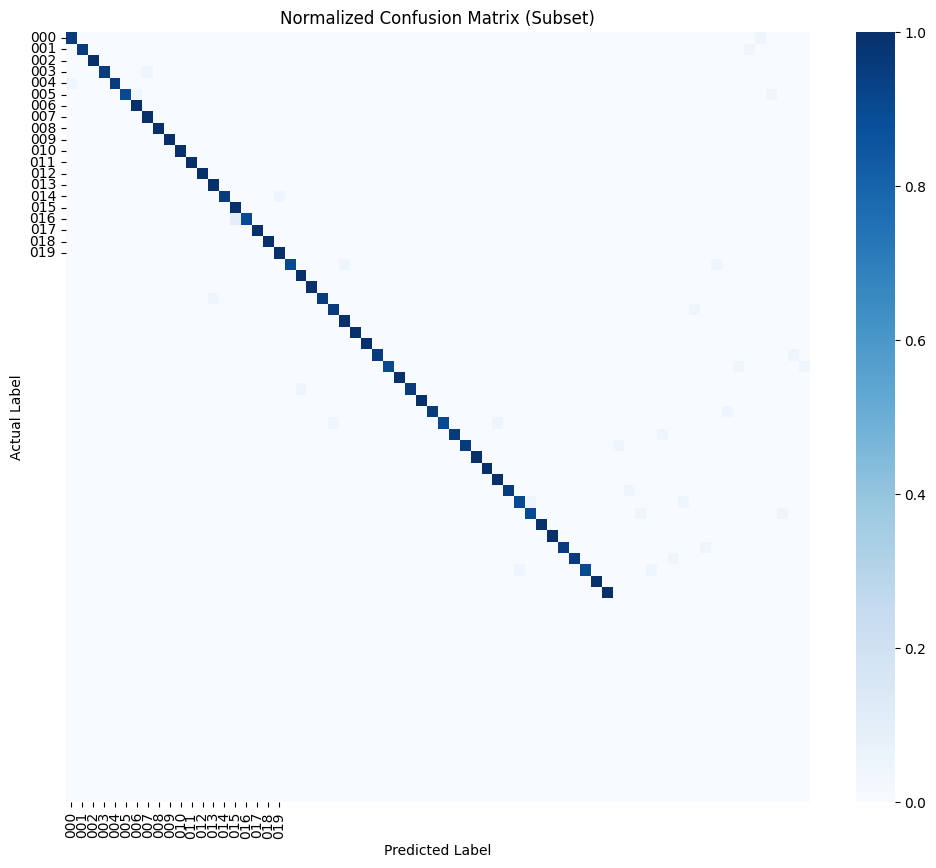

In [ ]:
# Normalize the confusion matrix by dividing each value by the sum of its row (i.e., number of actual occurrences per class)
# Add a small value (epsilon) to avoid division by zero
epsilon = 1e-10  # Small value to prevent division by zero
conf_matrix_subset_normalized = conf_matrix_subset.astype('float') / (conf_matrix_subset.sum(axis=1)[:, np.newaxis] + epsilon)

plt.figure(figsize=(12, 10))  # Increase the size of the figure
sns.heatmap(conf_matrix_subset_normalized, annot=False, fmt='.2f', cmap='Blues',
            xticklabels=list(test_generator.class_indices.keys())[:20],  # Limit to first 20 classes for readability
            yticklabels=list(test_generator.class_indices.keys())[:20])  # Adjust this number as needed
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.title('Normalized Confusion Matrix (Subset)')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


###Classification Report Generation
Description: This section generates a classification report for the model, including precision, recall, f1-score, and support for each class. It prints a summary for the entire dataset based on the model’s predictions.

In [20]:
from sklearn.metrics import classification_report

# Predict probabilities for the test set
pred_probabilities = best_model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size)

# Convert probabilities to class indices
pred_classes = np.argmax(pred_probabilities, axis=1)

# Get true classes
true_classes = test_generator.classes

# Generate a classification report
report = classification_report(true_classes, pred_classes, target_names=test_generator.class_indices.keys())
print(report)


625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 68ms/step
              precision    recall  f1-score   support

         000       0.91      1.00      0.95        20
         001       1.00      1.00      1.00        20
         002       0.87      1.00      0.93        20
         003       1.00      0.95      0.97        20
         004       0.95      0.95      0.95        20
         005       1.00      1.00      1.00        20
         006       0.95      1.00      0.98        20
         007       1.00      1.00      1.00        20
         008       1.00      1.00      1.00        20
         009       1.00      1.00      1.00        20
         010       1.00      0.95      0.97        20
         011       1.00      1.00      1.00        20
         012       1.00      1.00      1.00        20
         013       0.95      1.00      0.98        20
         014       1.00      0.95      0.97        20
         015       0.90      0.95      0.93        20
         016       1.00      1.00     

###Generating and Converting Classification Report to Dictionary Format
Description:
This section of the code generates a detailed classification report using sklearn.metrics.classification_report, which includes metrics like precision, recall, F1-score, and support for each class based on the true labels and predicted labels from the model. Additionally, it converts the report into a dictionary format for further analysis or processing.

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Assuming true_classes and pred_classes are already defined
true_classes = test_generator.classes  # Actual classes
pred_probabilities = best_model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size, verbose=1)
pred_classes = np.argmax(pred_probabilities, axis=1)

# Generate classification report and convert it to dictionary format
classification_report_dict = classification_report(true_classes, pred_classes, output_dict=True)


###F1-Score Visualization per Class
Description: This section visualizes the F1-score for each class using bar plots. It provides various visualizations, such as showing the top classes by F1-score and the bottom classes, for deeper performance analysis.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the classification report to a DataFrame for easier plotting
classification_report_df = pd.DataFrame(classification_report_dict).transpose()

# Exclude 'accuracy', 'macro avg', and 'weighted avg' from the plot
class_scores = classification_report_df[:-3]

# Plotting F1-score for a subset of classes (e.g., first 20)
plt.figure(figsize=(15, 5))
plt.bar(class_scores.index[:20], class_scores['f1-score'][:20], color='skyblue', width=0.6)
plt.xticks(rotation=45)
plt.xlabel('Classes')
plt.ylabel('F1-Score')
plt.title('F1-Score per Class (Subset)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Sorting classes by F1-score and plotting
sorted_class_scores = class_scores.sort_values('f1-score', ascending=False)

plt.figure(figsize=(15, 5))
plt.bar(sorted_class_scores.index, sorted_class_scores['f1-score'], color='skyblue', width=0.6)
plt.xticks(rotation=45)
plt.xlabel('Classes')
plt.ylabel('F1-Score')
plt.title('F1-Score per Class (Sorted)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plotting the top 10 classes with highest F1-score
plt.figure(figsize=(10, 5))
plt.bar(sorted_class_scores.index[:10], sorted_class_scores['f1-score'][:10], color='skyblue', width=0.6)
plt.xticks(rotation=45)
plt.xlabel('Classes')
plt.ylabel('F1-Score')
plt.title('Top 10 Classes by F1-Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plotting the bottom 10 classes with lowest F1-score
plt.figure(figsize=(10, 5))
plt.bar(sorted_class_scores.index[-10:], sorted_class_scores['f1-score'][-10:], color='skyblue', width=0.6)
plt.xticks(rotation=45)
plt.xlabel('Classes')
plt.ylabel('F1-Score')
plt.title('Bottom 10 Classes by F1-Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


###Precision-Recall Curve
Description: This section generates and visualizes the precision-recall curve for each class, allowing evaluation of how the model performs across recall thresholds for different classes.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
import tensorflow as tf

# Suppress TensorFlow logging
tf.get_logger().setLevel('ERROR')

# Assuming you have your test generator
test_generator.reset()  # Reset generator to start from the beginning

# Obtain true classes and predicted probabilities
y_true = []
y_scores = []

# Loop through the test generator to get all batches
for _ in range(len(test_generator)):
    X_batch, y_batch = next(test_generator)
    y_true.extend(np.argmax(y_batch, axis=1))
    y_scores_batch = best_model.predict(X_batch, verbose=0)  # Suppress verbose output with verbose=0
    y_scores.extend(y_scores_batch)

# Convert lists to numpy arrays for easier processing
y_true = np.array(y_true)
y_scores = np.array(y_scores)

# Debugging outputs
print(f'y_true shape: {y_true.shape}')
print(f'y_scores shape: {y_scores.shape}')
print(f'First few y_true values: {y_true[:10]}')
print(f'First few y_scores values: {y_scores[:10]}')

# Generate precision-recall curves for each class
plt.figure(figsize=(10, 8))

for i in range(len(test_generator.class_indices)):  # Loop through each class
    precision, recall, _ = precision_recall_curve(y_true == i, y_scores[:, i])
    plt.plot(recall, precision, lw=2, label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Each Class')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5)  # Adjust legend position
plt.grid(True)
plt.show()


###ROC Curve Visualization
Description: This section generates ROC curves for each class and visualizes the true positive rate (sensitivity) against the false positive rate (1-specificity).

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the output classes for multiclass ROC calculation
n_classes = len(test_generator.class_indices)
y_true_bin = label_binarize(true_classes, classes=list(range(n_classes)))

plt.figure(figsize=(10, 8))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], pred_probabilities[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label=f'Class {i} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')

# Modify the legend to place it below the plot and format it as a square
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=8, fontsize='small', frameon=False)

plt.show()


###Visualization of Correct and Incorrect Predictions in CNN
Description:
This code is designed to visualize the results of a Convolutional Neural Network (CNN) by displaying a few examples of both correct and incorrect predictions made by the model on the dataset. It iterates over batches of images, identifies where the model predictions are correct or incorrect, and plots a few examples of each. The displayed images show the predicted class and the true class, helping assess how well the model is performing and understand common mistakes it may be making.

Key functionalities include:
*   Displaying correctly predicted images with the predicted class label.
*   Displaying incorrectly predicted images alongside both the predicted and true class labels.
*   Ensuring that multiple examples are shown in a neatly arranged grid for easy comparison.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Show a few examples of correct and incorrect predictions
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()

correct_count = 0
incorrect_count = 0
seen_correct_classes = set()
seen_incorrect_classes = set()

# Iterate over multiple batches
while correct_count < 5 or incorrect_count < 5:
    X_batch, y_batch = next(test_generator)
    pred_probs = best_model.predict(X_batch)
    preds = np.argmax(pred_probs, axis=1)

    # Process correct predictions
    if correct_count < 5:
        correct_indices = np.where(preds == np.argmax(y_batch, axis=1))[0]
        for index in correct_indices:
            predicted_class = preds[index]
            if correct_count < 5 and predicted_class not in seen_correct_classes:
                axes[correct_count].set_title(f'Correct: {predicted_class}')
                axes[correct_count].imshow(X_batch[index].squeeze(), cmap='gray')
                correct_count += 1
                seen_correct_classes.add(predicted_class)
            if correct_count >= 5:
                break

    # Process incorrect predictions
    if incorrect_count < 5:
        incorrect_indices = np.where(preds != np.argmax(y_batch, axis=1))[0]
        for index in incorrect_indices:
            predicted_class = preds[index]
            true_class = np.argmax(y_batch[index])
            if incorrect_count < 5 and (predicted_class, true_class) not in seen_incorrect_classes:
                axes[5 + incorrect_count].set_title(f'Incorrect: {predicted_class}, True: {true_class}')
                axes[5 + incorrect_count].imshow(X_batch[index].squeeze(), cmap='gray')
                incorrect_count += 1
                seen_incorrect_classes.add((predicted_class, true_class))
            if incorrect_count >= 5:
                break

    # Check if all required images have been found
    if correct_count >= 5 and incorrect_count >= 5:
        break

plt.tight_layout()
plt.show()
